Portfolio 4


Question: Exploring the various medical and demographic factors and the likelihood of developing diabetes, and trying to find the relationship between diabetes and death rate.

Dataset Description

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes, and also see relationship between death rate.

Import Packages

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load Dataset and Clean Dataset


In [282]:
Data = pd.read_csv('./PORTFOLIO 4/diabetes_prediction_dataset.csv')
Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [283]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [284]:
Data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Data with Transpose (T - Transpose)

In [285]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Check for null values or not

In [286]:
Data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [287]:
Data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data Visualization before removing null values

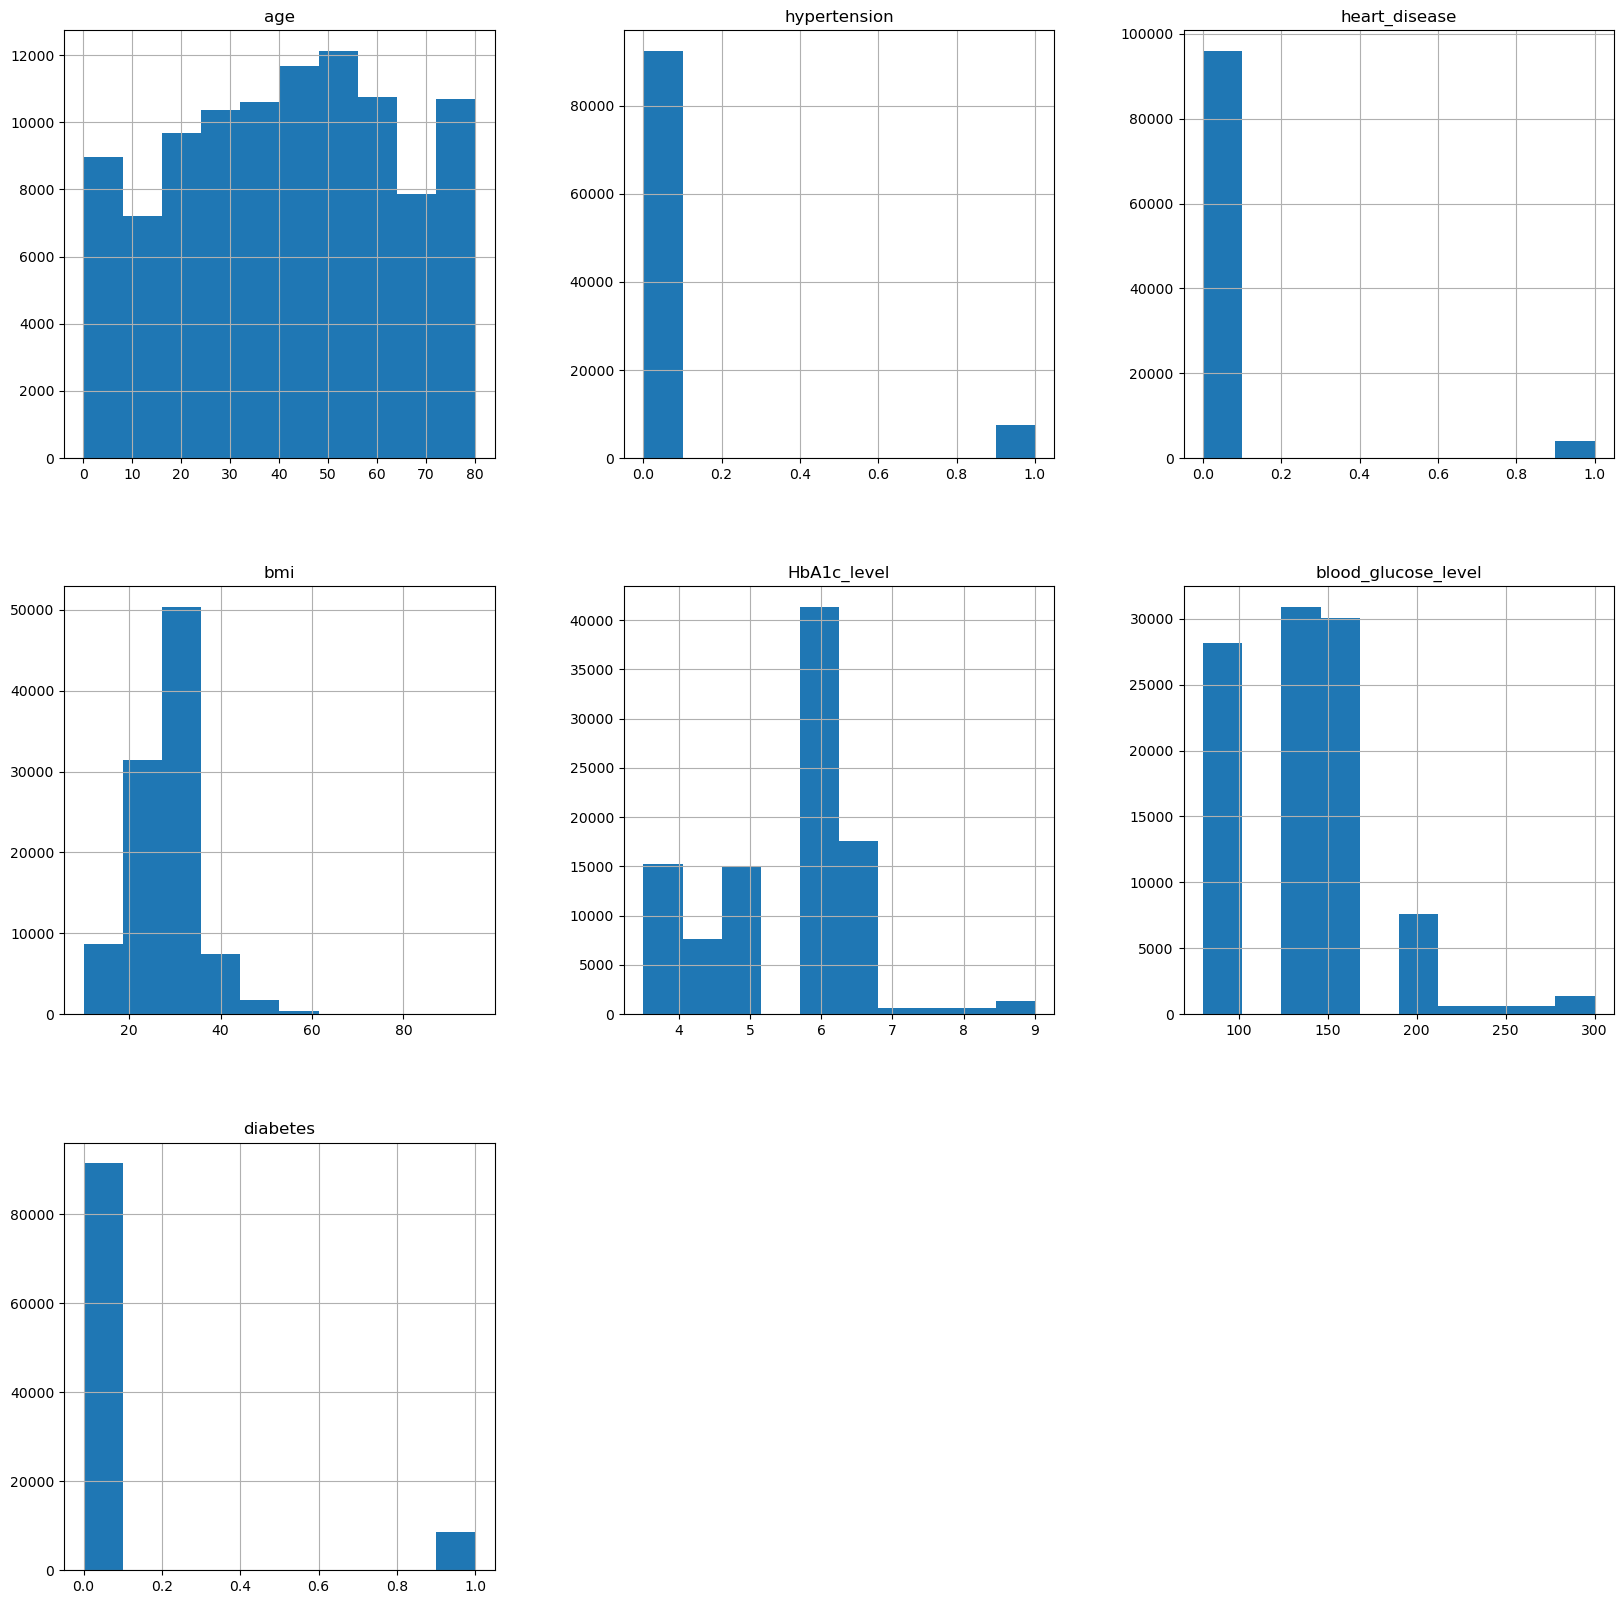

In [288]:
p = Data.hist(figsize = (20,20))

Replace 0 with NAN

In [289]:

Data_copy['age'].fillna(Data_copy['age'].mean(), inplace = True)
Data_copy['hypertension'].fillna(Data_copy['hypertension'].mean(), inplace = True)
Data_copy['bmi'].fillna(Data_copy['bmi'].mean(), inplace = True)
Data_copy['heart_disease'].fillna(Data_copy['heart_disease'].mean(), inplace = True)
Data_copy['HbA1c_level'].fillna(Data_copy['HbA1c_level'].mean(), inplace = True)
Data_copy['blood_glucose_level'].fillna(Data_copy['blood_glucose_level'].mean(), inplace = True)
Data_copy['diabetes'].fillna(Data_copy['diabetes'].mean(), inplace = True)


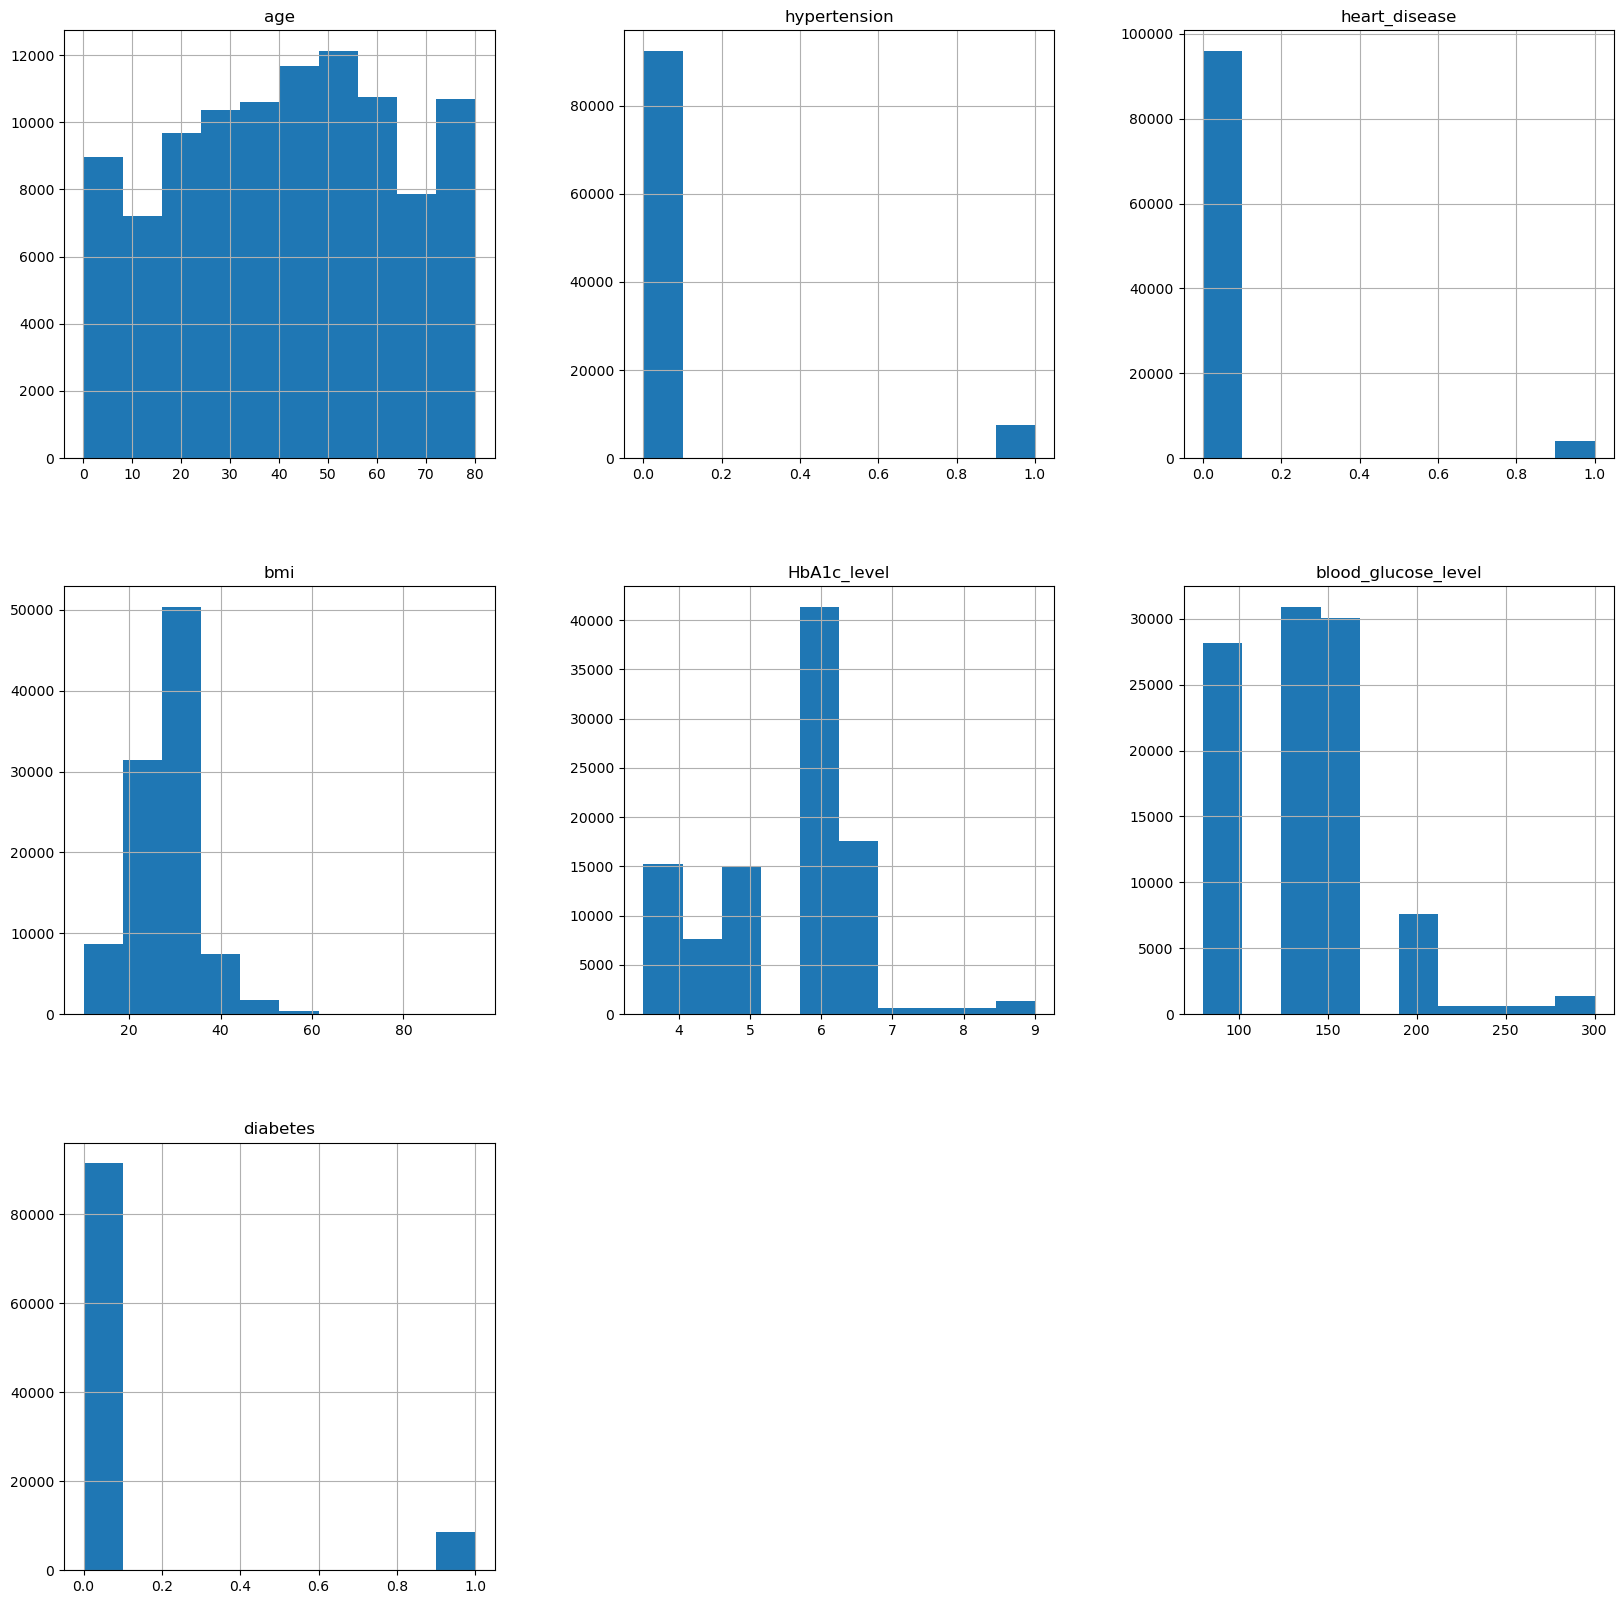

In [290]:
p = Data_copy.hist(figsize = (20,20))

In [291]:
Data = Data.fillna(0)

print (Data)


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

Histogram for age

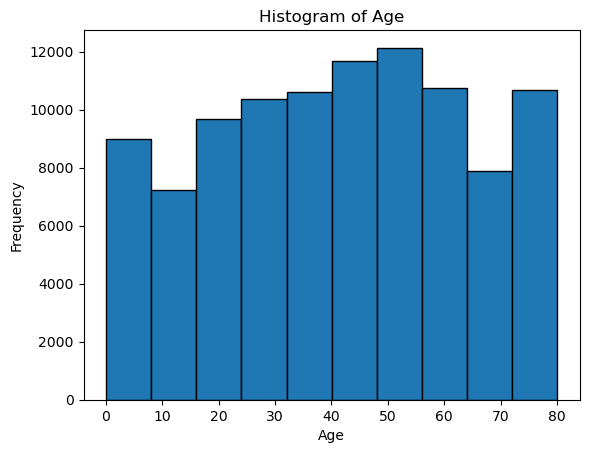

In [292]:
plt.hist(Data['age'], edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

BoxPlot for BMI

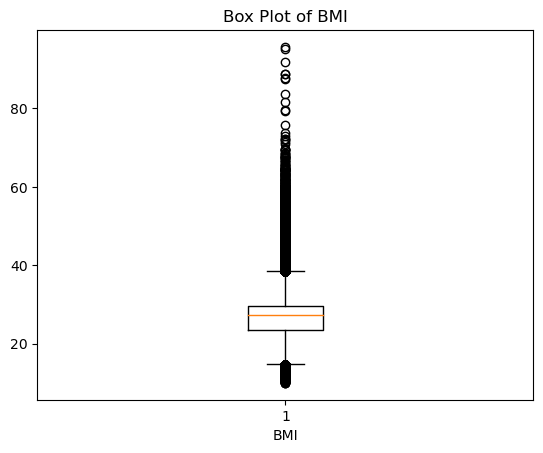

In [293]:
plt.boxplot(Data['bmi'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

Bar plot smoking history

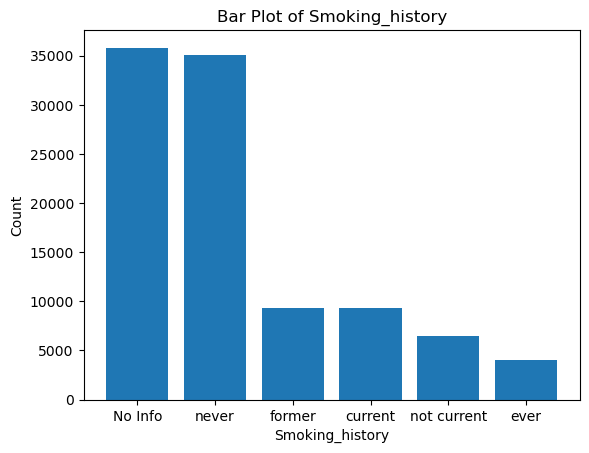

In [294]:
smoking_history = Data['smoking_history'].value_counts()
plt.bar(smoking_history.index, smoking_history.values)
plt.xlabel('Smoking_history')
plt.ylabel('Count')
plt.title('Bar Plot of Smoking_history')
plt.show()

Box plot for Gender

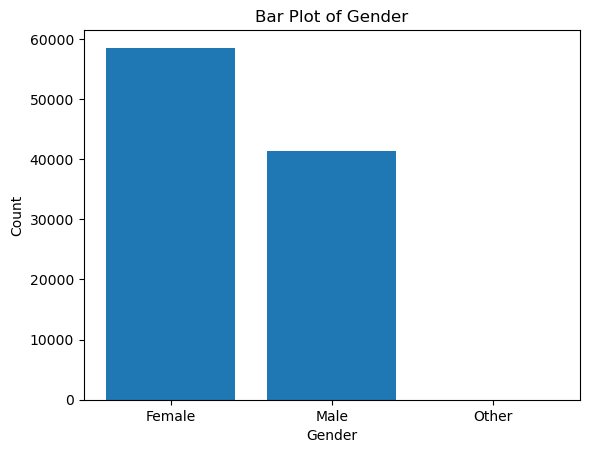

In [295]:
gender_counts = Data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender')
plt.show()

Box plot for hypertension

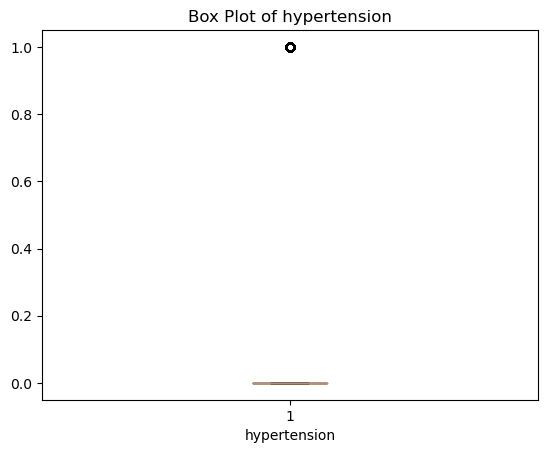

In [296]:
plt.boxplot(Data['hypertension'])
plt.xlabel('hypertension')
plt.title('Box Plot of hypertension')
plt.show()

Scatterplot for blood_glucose_level & HbA1c_level

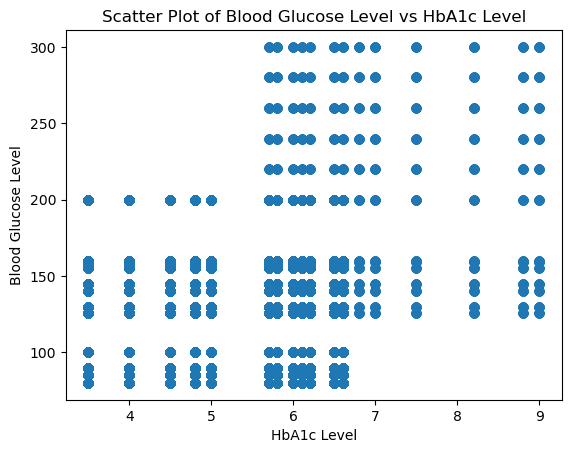

In [297]:
plt.scatter(Data['HbA1c_level'], Data['blood_glucose_level'])
plt.ylabel('Blood Glucose Level')
plt.xlabel('HbA1c Level')
plt.title('Scatter Plot of Blood Glucose Level vs HbA1c Level')
plt.show()

Box plot for Heart disease

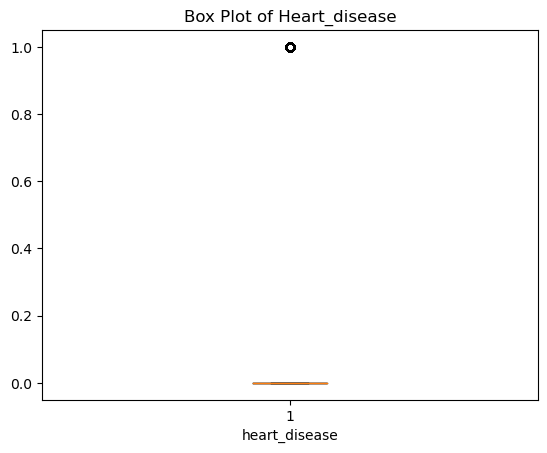

In [298]:
plt.boxplot(Data['heart_disease'])
plt.xlabel('heart_disease')
plt.title('Box Plot of Heart_disease')
plt.show()

Pie chart for Diabetes

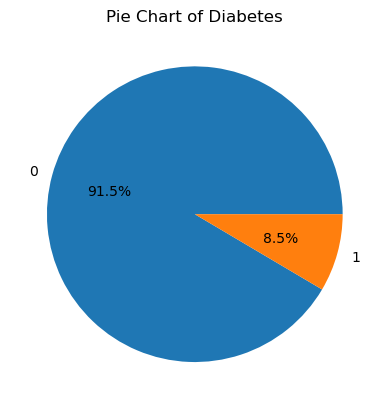

In [299]:
diabetes_counts = Data['diabetes'].value_counts()
plt.pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Diabetes')
plt.show()

In [300]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

Correlation

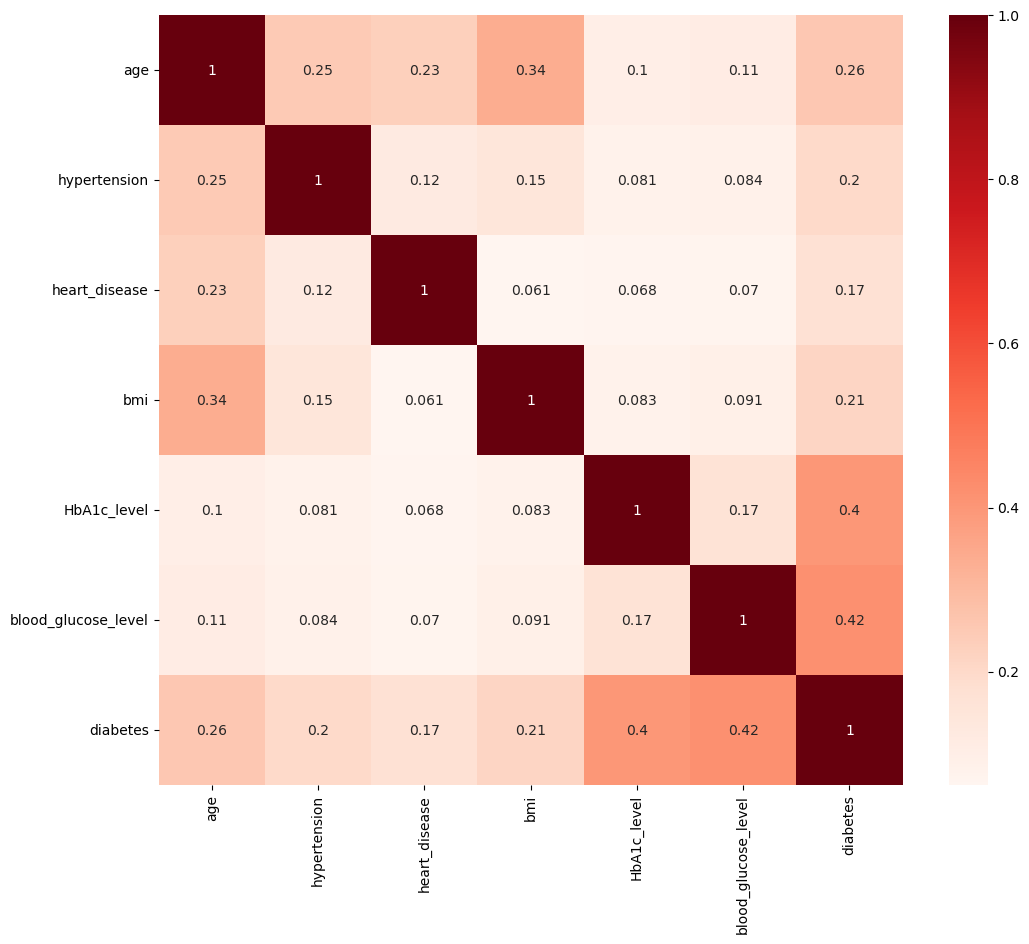

In [301]:
plt.figure(figsize=(12,10))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [302]:
Data_diabetes = Data[Data['diabetes']==1]

In [303]:
from pandas.plotting import scatter_matrix

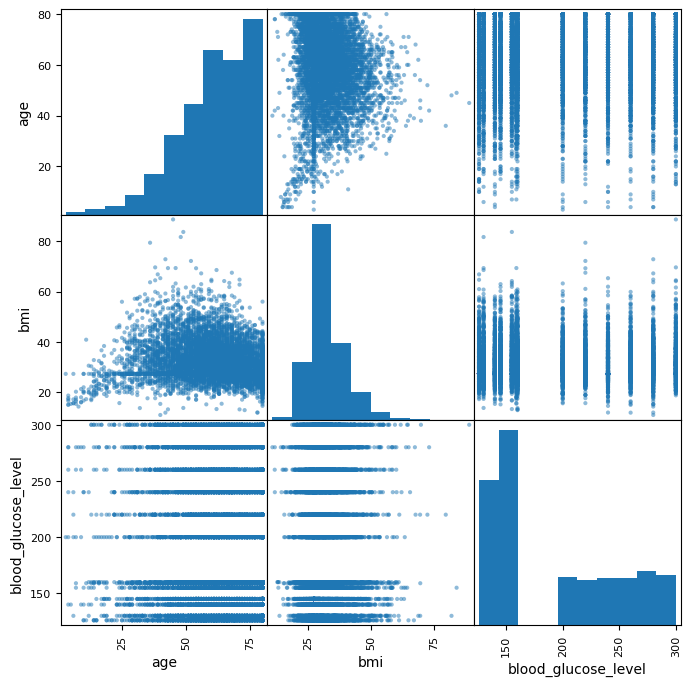

In [304]:
scatter_matrix(Data_diabetes[['age', 'bmi', 'blood_glucose_level']], figsize=(8, 8))
plt.show()

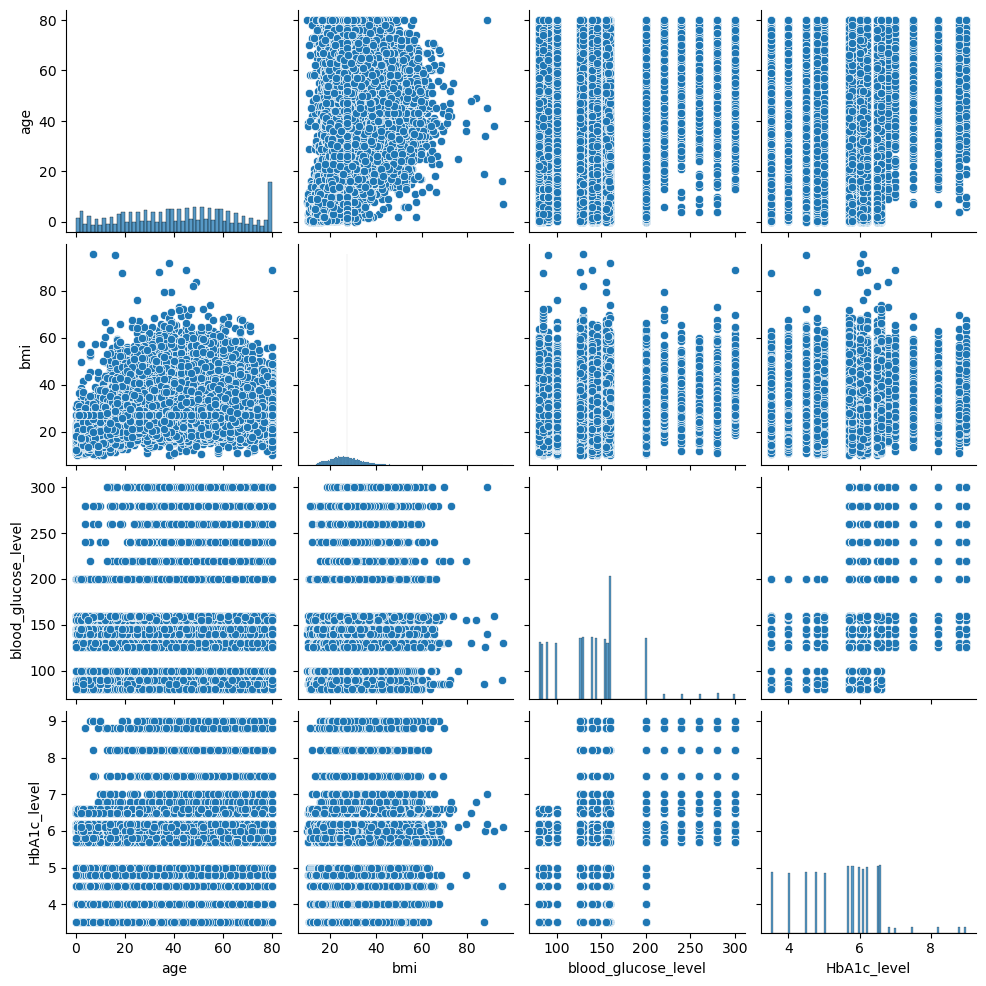

In [305]:
sns.pairplot(Data[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.show()

In [306]:
Data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [307]:
gender_encoded = pd.get_dummies(Data['gender'], prefix='gender')


smoking_encoded = pd.get_dummies(Data['smoking_history'], prefix='smoking')

dataset_encoded = pd.concat([Data, gender_encoded, smoking_encoded], axis=1)
dataset_encoded = dataset_encoded.drop(columns=['gender','smoking_history'],axis=1)

dataset_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [308]:
Data_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Data Description : Data rate from Diabetes, 2019 from Our World In Data
                   Source : Institute for Health Metrics and Evaluation, Global Burden of Disease (2019)

In [322]:
New = pd.read_csv('./PORTFOLIO 4/death-rate-from-diabetes.csv')
New.head()

,Entity,Code,Year,Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,30.93
1,Afghanistan,AFG,1991,30.37
2,Afghanistan,AFG,1992,29.84
3,Afghanistan,AFG,1993,29.65
4,Afghanistan,AFG,1994,29.62


In [310]:
New.describe()

,Year,Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)
count,6840.000000,6840.000000
mean,2004.500000,38.531803
std,8.656074,35.857611
min,1990.000000,2.080000
25%,1997.000000,14.350000
50%,2004.500000,30.180000
75%,2012.000000,46.622500
max,2019.000000,278.190000


In [311]:
New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 6840 non-null   object 
 1   Code                                                                   6150 non-null   object 
 2   Year                                                                   6840 non-null   int64  
 3   Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


Process of Object data type, merging two data sets together

In [312]:
New_Data = pd.concat((Data.iloc[:,0], New, Data.iloc[:,2:]), axis=1)
New_Data.head()

,gender,Entity,Code,Year,Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate),hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,Afghanistan,AFG,1990.0,30.93,0,1,never,25.19,6.6,140,0
1,Female,Afghanistan,AFG,1991.0,30.37,0,0,No Info,27.32,6.6,80,0
2,Male,Afghanistan,AFG,1992.0,29.84,0,0,never,27.32,5.7,158,0
3,Female,Afghanistan,AFG,1993.0,29.65,0,0,current,23.45,5.0,155,0
4,Male,Afghanistan,AFG,1994.0,29.62,1,1,current,20.14,4.8,155,0


In [313]:
dfresult = New_Data.dropna()
print(dfresult)

      gender       Entity Code    Year  \
0     Female  Afghanistan  AFG  1990.0   
1     Female  Afghanistan  AFG  1991.0   
2       Male  Afghanistan  AFG  1992.0   
3     Female  Afghanistan  AFG  1993.0   
4       Male  Afghanistan  AFG  1994.0   
...      ...          ...  ...     ...   
6835  Female     Zimbabwe  ZWE  2015.0   
6836    Male     Zimbabwe  ZWE  2016.0   
6837    Male     Zimbabwe  ZWE  2017.0   
6838    Male     Zimbabwe  ZWE  2018.0   
6839    Male     Zimbabwe  ZWE  2019.0   

      Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)  \
0                                                 30.93                       
1                                                 30.37                       
2                                                 29.84                       
3                                                 29.65                       
4                                                 29.62                       
...                  

In [314]:
from sklearn.model_selection import train_test_split
print(New_Data['Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)'].value_counts())


16.05    7
14.80    7
15.75    7
12.69    7
37.19    6
        ..
54.13    1
54.04    1
54.09    1
53.93    1
57.12    1
Name: Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate), Length: 4443, dtype: int64


Diabetes and Death visualisation

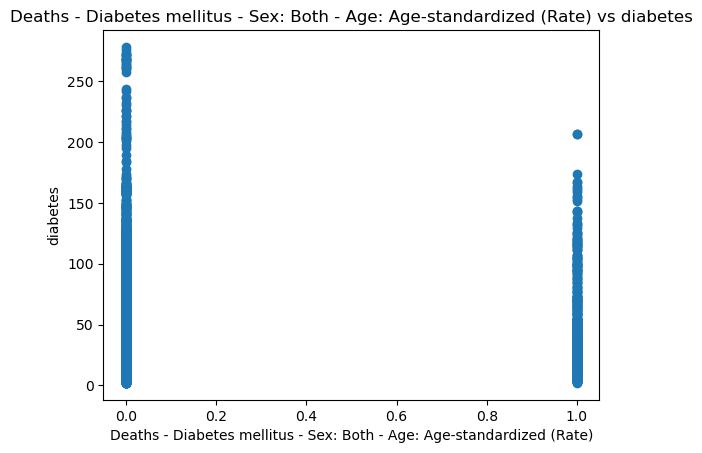

In [315]:
plt.scatter(New_Data['diabetes'], New_Data['Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)'])
plt.xlabel('Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)')
plt.ylabel('diabetes')
plt.title('Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate) vs diabetes')
plt.show()

In [316]:
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
 [[3]]


In [318]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [319]:
reg = linear_model.LinearRegression()
X = New_Data[['diabetes']].head(15)
y = New_Data['Deaths - Diabetes mellitus - Sex: Both - Age: Age-standardized (Rate)'].head(15)
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.65071429] + 31.32071428571429


In [320]:
reg.predict(X[:1])

array([31.32071429])

In [321]:
y =1.4 * 31.32071428571429 -1.65071429
y

42.19828571

Analysis : From the data visualisation , after merging the data , we can see the diabetes is linked with the death, with the increase in glucose level or sugar level, we can see the death rate is increasing. Some of the other health issuses are also linked to diabetes but some are not, so it's hard to say that smoking cause diabetes or not, same with hypertension , heart disease, etc. Age plays a important role in diabetes but it is found in children also. Afer correlation we found a link between diabetes and death in the world.